<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

### Datos del alumno:

- Alumno: Víctor David Silva
- Cohorte: 14

In [4]:
import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


In [5]:
!pip install transformers --quiet

In [6]:
import tensorflow
from transformers import TFBertModel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Modelo 1 (base): 

- 3 clases
- 1 capa lineal

### Definiendo modelo

In [7]:
# Usamos bert en inglés porque el dataset es en inglés, usamos el modelo base de BERT
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

2024-09-02 00:46:15.066869: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-02 00:46:15.066915: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-02 00:46:15.066931: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-02 00:46:15.067023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-02 00:46:15.067288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bia

In [8]:
max_length = 140

In [9]:
# Vamos a clasificar en 3 clases
output_shape = 3

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model1 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [10]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [11]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [12]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  42027      0  0:00:03  0:00:03 --:--:-- 88094
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   577k      0  0:00:12  0:00:12 --:--:-- 1570k


In [13]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

# Solo nos vamos a quedar con el texto de la review.

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [14]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


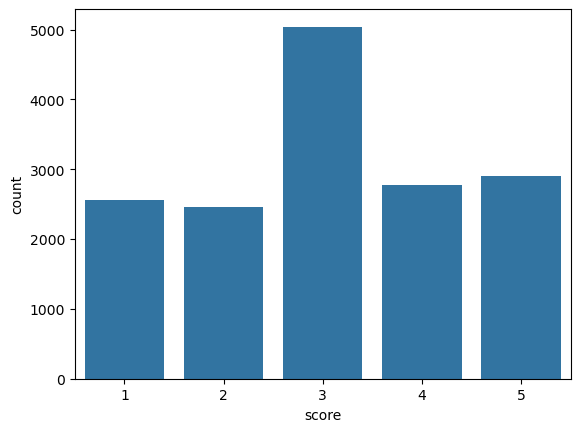

In [15]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score);

# Tiene 5 clases, de 1 a 5, la del medio es mayoritaria. Se puede restructurar el problema colapsando 1 o 2 a malo, 4 y 5 en bueno

Se tiene un score que va desde 1 a 5, es decir 5 posibles calificaciones. 

## Limpieza de datos

Se van a condensar los resultados de 1 y 2 en 0, y de 4 y 5 en 2, dejando el score de 3 como 1. De esta manera se convierte la cantidad de clases en 3 siendo estas:

- negative
- neutral
- positive

In [16]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_12401/3945955594.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


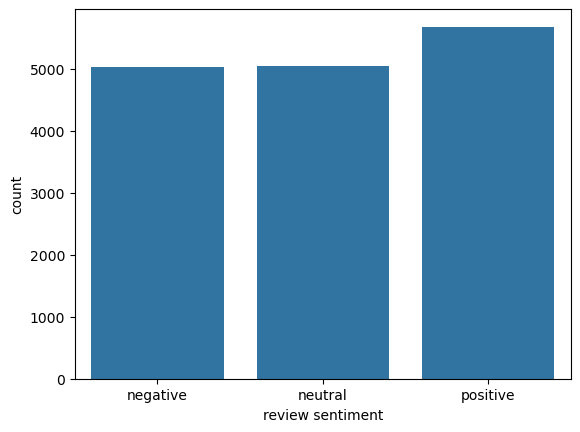

In [17]:
ax = sns.countplot(x='sentiment', data=df)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [18]:
# Se observa que ahora los valores único son solo 3
df['sentiment'].unique()

array([0, 1, 2])

In [19]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


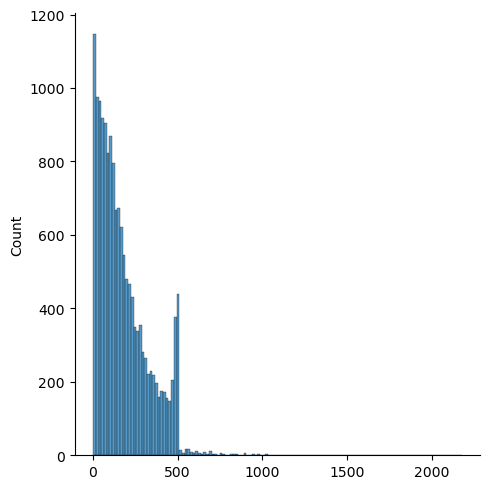

In [20]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

# Transformamos en vectores OHE

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [23]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset, codifica el modelo para lo que espera en la entrada
from transformers import BertTokenizer
import numpy as np

In [24]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences)) # Le vamos a pasar una función, esto es útil cuando no se pueden tener todos los datos en RAM, sino que los inyecta de a poco en batches 
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)
# Hacemos 2 splits porque tenemos train, val, test.
# Va a consumir los índices y va a saber que pasarle como train y que como val

In [26]:
print('Cantidad de índices de train: ', idx_train.shape[0])
print('Cantidad de índices de val: ', idx_val.shape[0])
print('Cantidad de índices de test: ', idx_test.shape[0])

Cantidad de índices de train:  10076
Cantidad de índices de val:  2520
Cantidad de índices de test:  3150


In [27]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None, # BERT podría tomar 2 textos serparados y podía unirlos con un token especial de separación. Pero en text b no ponemos nada
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

# Consume la lista anterior y el tokenizador de bert 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensores de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante, devuelve una tupla con la palabra yield (como un return), que mantiene la memoria del estado anterior, menteniendo el for activo.
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32), # Le definimos el tipo de datos de la salida
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]), # Le damos el shape
        ),
    )

In [28]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

# Entran los ejemplos de train
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32) # Podemos configurar el tamaño de batch y mezclamos de a 100 datos

# Entran los ejemplos de val
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [29]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [30]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [31]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [32]:
history1 = model1.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15


2024-09-02 00:46:54.271394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 589s 2s/step - loss: 1.0888 - accuracy: 0.4114 - f1_score: 0.4005

2024-09-02 00:56:37.497503: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6542594443337906228
2024-09-02 00:56:37.497518: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 6895404632516362648
2024-09-02 00:56:37.497522: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 12639364136862208858
2024-09-02 00:56:37.497527: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12040820831486062102
2024-09-02 00:56:37.497534: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1646376563683037001
2024-09-02 00:56:37.497538: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 17197503309902027329
2024-09-02 00:56:37.497543: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv 

315/315 [==============================] - 717s 2s/step - loss: 1.0888 - accuracy: 0.4114 - f1_score: 0.4005 - val_loss: 1.0165 - val_accuracy: 0.5135 - val_f1_score: 0.4168
Epoch 2/15


2024-09-02 00:58:45.646556: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 5250296378596274543
2024-09-02 00:58:45.646575: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 238875010729898560
2024-09-02 00:58:45.646588: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10992924547540763622
2024-09-02 00:58:45.646594: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8847862888222847777
2024-09-02 00:58:45.646604: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 10599490762642113681
2024-09-02 00:58:45.646610: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13182090183190362964
2024-09-02 00:58:45.646623: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv i

315/315 [==============================] - 631s 2s/step - loss: 1.0191 - accuracy: 0.4835 - f1_score: 0.4705 - val_loss: 0.9604 - val_accuracy: 0.5429 - val_f1_score: 0.5112
Epoch 3/15
315/315 [==============================] - 449s 1s/step - loss: 0.9804 - accuracy: 0.5193 - f1_score: 0.5068 - val_loss: 0.9471 - val_accuracy: 0.5345 - val_f1_score: 0.4842
Epoch 4/15
315/315 [==============================] - 448s 1s/step - loss: 0.9589 - accuracy: 0.5298 - f1_score: 0.5177 - val_loss: 0.9183 - val_accuracy: 0.5552 - val_f1_score: 0.5419
Epoch 5/15
315/315 [==============================] - 463s 1s/step - loss: 0.9479 - accuracy: 0.5392 - f1_score: 0.5273 - val_loss: 0.9184 - val_accuracy: 0.5619 - val_f1_score: 0.4925
Epoch 6/15
315/315 [==============================] - 471s 1s/step - loss: 0.9335 - accuracy: 0.5423 - f1_score: 0.5312 - val_loss: 0.8889 - val_accuracy: 0.5754 - val_f1_score: 0.5337
Epoch 7/15
315/315 [==============================] - 470s 1s/step - loss: 0.9264 - ac

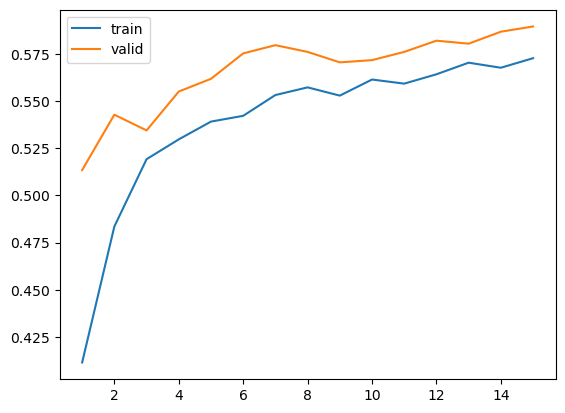

In [33]:
plot_train_metrics(history1)

In [34]:
y_hat_prob1 = model1.predict(X_test)
y_hat_prob1[:3]

2024-09-02 02:50:07.313579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 114s 1s/step


array([[0.47575778, 0.3741772 , 0.150065  ],
       [0.5134585 , 0.24298671, 0.24355477],
       [0.17447296, 0.4015517 , 0.4239754 ]], dtype=float32)

In [35]:
y_hat1 = np.argmax(y_hat_prob1, axis=1)

In [36]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores = model1.evaluate(X_test, y_test)
scores[1]

2024-09-02 02:52:01.070443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 116s 1s/step - loss: 0.8516 - accuracy: 0.6019 - f1_score: 0.5808


0.6019047498703003

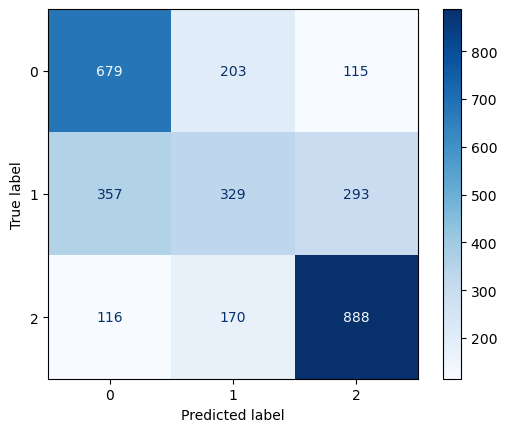

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test.argmax(axis=1), y_hat1)
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=list(range(3)))
cmd1.plot(cmap=plt.cm.Blues)
plt.show()

Se observa que se tuvo buenos resultados para perdecir que son valores positivo o negativos, pero no así tan bien con los comentarios neutrales.

## Ensayo

In [38]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [39]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [40]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 4s 4s/step
Clasificación: positive


In [41]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [43]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 0s 497ms/step
Clasificación: negative


In [44]:
text = "It works as expected, but it’s nothing special"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[ 101 2009 2573 2004 3517 1010 2021 2009 1521 1055 2498 2569  102    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [45]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [46]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 1s 522ms/step
Clasificación: neutral


En estos 3 casos, se observa que el positivo y el negativo fueron correctamente predichos, pero en cambio, en el neutral como que tiene a ser postivo fue tomado como este.

# Modelo 2: 

- 3 clases de salida
- 1 capa densa adicional

### Creación de modelo

In [47]:
# Vamos a clasificar en 3 clases como en el modelo anterior
output_shape = 3

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

# Se agrega otra capa densa la arquitectura
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)

output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model2 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [48]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

### Entrenamiento del modelo

In [49]:
history2 = model2.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15


2024-09-02 02:54:05.986966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 392s 1s/step - loss: 1.0985 - accuracy: 0.4262 - f1_score: 0.4192

2024-09-02 03:00:33.998594: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 7586384396320469288
2024-09-02 03:00:33.998605: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 11816450037858019866
2024-09-02 03:00:33.998607: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 13321914066936567118
2024-09-02 03:00:33.998613: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7398825903618848965
2024-09-02 03:00:33.998616: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17354160627502244101
2024-09-02 03:00:33.998621: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7890307648789648443
2024-09-02 03:00:33.998624: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send 

315/315 [==============================] - 488s 2s/step - loss: 1.0985 - accuracy: 0.4262 - f1_score: 0.4192 - val_loss: 0.9776 - val_accuracy: 0.5139 - val_f1_score: 0.4456
Epoch 2/15


2024-09-02 03:02:09.806909: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 1007217703570640938
2024-09-02 03:02:09.806922: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 15360467977220439554
2024-09-02 03:02:09.806925: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 14691343096491427606
2024-09-02 03:02:09.806932: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 550276246584257309
2024-09-02 03:02:09.806943: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14896902024987686005
2024-09-02 03:02:09.806946: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 295290837402006593


315/315 [==============================] - 461s 1s/step - loss: 1.0069 - accuracy: 0.4835 - f1_score: 0.4704 - val_loss: 0.9119 - val_accuracy: 0.5544 - val_f1_score: 0.4956
Epoch 3/15
315/315 [==============================] - 463s 1s/step - loss: 0.9833 - accuracy: 0.5080 - f1_score: 0.4959 - val_loss: 0.8915 - val_accuracy: 0.5659 - val_f1_score: 0.5203
Epoch 4/15
315/315 [==============================] - 462s 1s/step - loss: 0.9761 - accuracy: 0.5186 - f1_score: 0.5078 - val_loss: 0.8935 - val_accuracy: 0.5583 - val_f1_score: 0.4709
Epoch 5/15
315/315 [==============================] - 461s 1s/step - loss: 0.9552 - accuracy: 0.5295 - f1_score: 0.5174 - val_loss: 0.8825 - val_accuracy: 0.5599 - val_f1_score: 0.4719
Epoch 6/15
315/315 [==============================] - 462s 1s/step - loss: 0.9374 - accuracy: 0.5383 - f1_score: 0.5277 - val_loss: 1.0070 - val_accuracy: 0.4944 - val_f1_score: 0.4468
Epoch 7/15
315/315 [==============================] - 461s 1s/step - loss: 0.9390 - ac

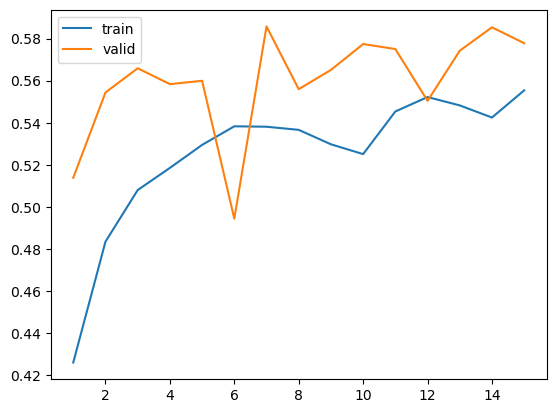

In [50]:
plot_train_metrics(history2)

In [51]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

2024-09-02 04:49:47.959188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 122s 1s/step


array([[0.30561477, 0.44214627, 0.252239  ],
       [0.3924988 , 0.28855932, 0.31894186],
       [0.05825378, 0.36060917, 0.581137  ]], dtype=float32)

In [52]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [53]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores2 = model2.evaluate(X_test, y_test)
scores2[1]

2024-09-02 04:51:49.757425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 125s 1s/step - loss: 0.8741 - accuracy: 0.5781 - f1_score: 0.5538


0.5780952572822571

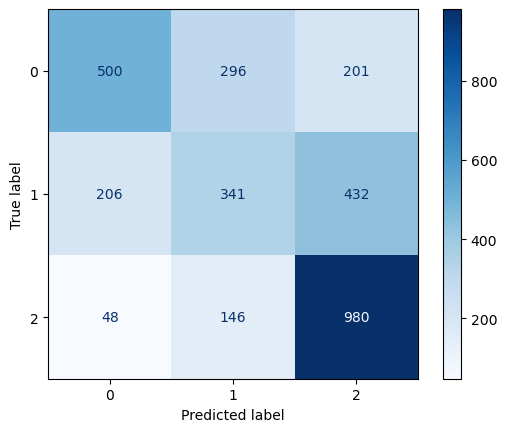

In [54]:
cm2 = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=list(range(3)))
cmd2.plot(cmap=plt.cm.Blues)
plt.show()

### Evaluación

In [55]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [56]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [57]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 7s 7s/step
Clasificación: positive


In [58]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [60]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 1s 715ms/step
Clasificación: positive


In [61]:
text = "It works as expected, but it’s nothing special"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[ 101 2009 2573 2004 3517 1010 2021 2009 1521 1055 2498 2569  102    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [62]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [63]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 1s 1s/step
Clasificación: neutral


En estos 3 casos, se observa que el positivo y el negativo fueron correctamente predichos, pero en cambio, en el neutral como que tiene a ser postivo fue tomado como este.

# Modelo 3:

- 5 clases de salida

### Creación del modelo

In [64]:
# Vamos a clasificar en 5 clases
output_shape = 5

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [65]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

### Datos para 5 clases

In [66]:
# Armar el dataset nuevamente pero ahora dejamos las 5 clases
# Solo nos vamos a quedar con el texto de la review.
df5 = pd.read_csv('reviews.csv')

In [67]:
# Balancear los datos
df5['sentiment'] = df5['score']-1
class_names = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

In [68]:
# Se observa que ahora los valores únicos son 5
df5['sentiment'].unique()

array([0, 1, 2, 3, 4])

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_12401/3497894424.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


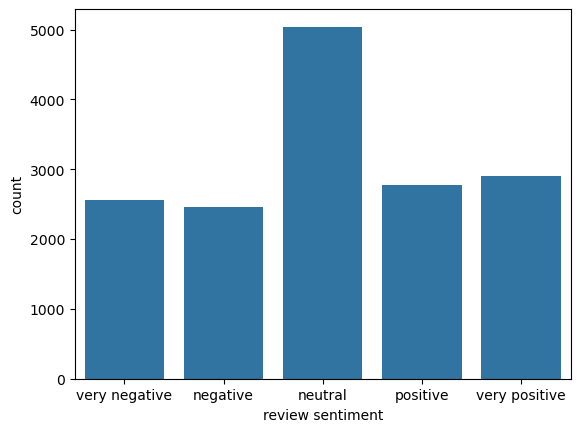

In [69]:
ax = sns.countplot(x='sentiment', data=df5)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [70]:
sentences = df5['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Median: 139.0


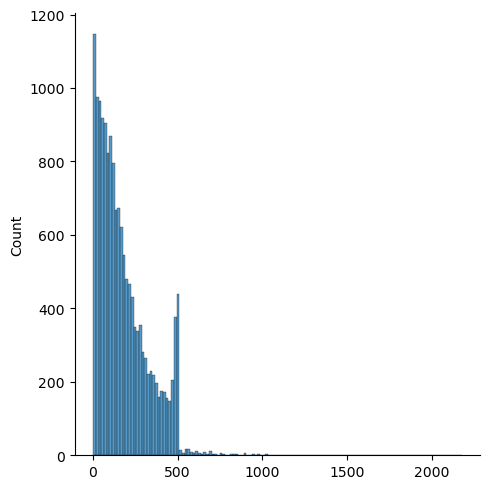

In [71]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [72]:
y = df5['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:5])
output_shape = y.shape[1]
print("output shape:", output_shape)

# Transformamos en vectores OHE

y shape: (15746,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
output shape: 5


### Generador de datos

In [73]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer3 = BertTokenizer.from_pretrained("bert-base-uncased")

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [74]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences)) # Le vamos a pasar una función, esto es útil cuando no se pueden tener todos los datos en RAM, sino que los inyecta de a poco en batches 
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)
# Hacemos 2 splits porque tenemos train, val, test.
# Va a consumir los índices y va a saber que pasarle como train y que como val

In [75]:
print('Cantidad de índices de train: ', idx_train.shape[0])
print('Cantidad de índices de val: ', idx_val.shape[0])
print('Cantidad de índices de test: ', idx_test.shape[0])

Cantidad de índices de train:  10076
Cantidad de índices de val:  2520
Cantidad de índices de test:  3150


In [76]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

# Entran los ejemplos de train
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer3, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32) # Podemos configurar el tamaño de batch y mezclamos de a 100 datos

# Entran los ejemplos de val
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer3, max_length=max_length)
validation_data = validation_data.batch(32)

In [77]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer3(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [78]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [79]:
y_test = y[idx_test]

### Entrenamiento del modelo

In [80]:
history3 = model3.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15


2024-09-02 04:54:16.256117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 402s 1s/step - loss: 1.5744 - accuracy: 0.3122 - f1_score: 0.2066

2024-09-02 05:00:54.803221: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 4725522151263238160
2024-09-02 05:00:54.803237: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 16064867099517411306
2024-09-02 05:00:54.803254: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1646376563683037001
2024-09-02 05:00:54.803259: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2897592310104029673
2024-09-02 05:00:54.803265: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5756641609286744609
2024-09-02 05:00:54.803267: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 3948318973693217767
2024-09-02 05:00:54.803269: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send it

315/315 [==============================] - 511s 2s/step - loss: 1.5744 - accuracy: 0.3122 - f1_score: 0.2066 - val_loss: 1.5009 - val_accuracy: 0.3290 - val_f1_score: 0.2996
Epoch 2/15


2024-09-02 05:02:42.896141: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 14951109775954720719
2024-09-02 05:02:42.896165: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14804418620542832689
2024-09-02 05:02:42.896219: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15728097484791998395
2024-09-02 05:02:42.896224: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 4164643974447981509
2024-09-02 05:02:42.896229: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1478065685744021417
2024-09-02 05:02:42.896234: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12359392276515610810
2024-09-02 05:02:42.896236: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send

315/315 [==============================] - 463s 1s/step - loss: 1.4963 - accuracy: 0.3519 - f1_score: 0.2529 - val_loss: 1.4317 - val_accuracy: 0.4159 - val_f1_score: 0.2869
Epoch 3/15
315/315 [==============================] - 468s 1s/step - loss: 1.4539 - accuracy: 0.3765 - f1_score: 0.2782 - val_loss: 1.4174 - val_accuracy: 0.4067 - val_f1_score: 0.3781
Epoch 4/15
315/315 [==============================] - 464s 1s/step - loss: 1.4253 - accuracy: 0.3937 - f1_score: 0.3004 - val_loss: 1.4140 - val_accuracy: 0.3825 - val_f1_score: 0.2920
Epoch 5/15
315/315 [==============================] - 464s 1s/step - loss: 1.4106 - accuracy: 0.3979 - f1_score: 0.3132 - val_loss: 1.3807 - val_accuracy: 0.4187 - val_f1_score: 0.3264
Epoch 6/15
315/315 [==============================] - 463s 1s/step - loss: 1.3933 - accuracy: 0.4023 - f1_score: 0.3263 - val_loss: 1.3464 - val_accuracy: 0.4401 - val_f1_score: 0.3438
Epoch 7/15
315/315 [==============================] - 464s 1s/step - loss: 1.3827 - ac

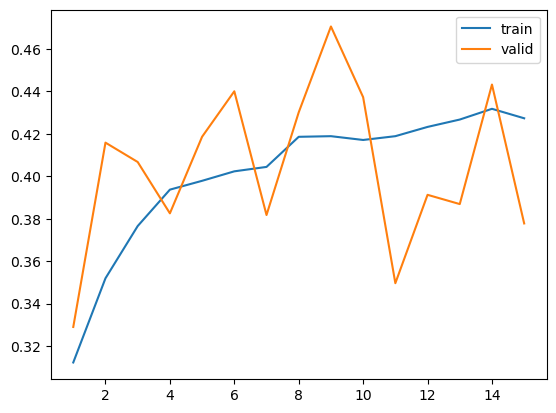

In [81]:
plot_train_metrics(history3)

In [82]:
y_hat_prob3 = model3.predict(X_test)
y_hat_prob3[:3]

2024-09-02 06:51:51.953797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 134s 1s/step


array([[0.24789011, 0.34687564, 0.26695096, 0.08467186, 0.05361144],
       [0.16938521, 0.45823908, 0.19077744, 0.1056999 , 0.07589833],
       [0.06293248, 0.2306314 , 0.31407574, 0.26279134, 0.12956905]],
      dtype=float32)

In [83]:
y_hat3 = np.argmax(y_hat_prob3, axis=1)

In [84]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores3 = model3.evaluate(X_test, y_test)
scores3[1]

2024-09-02 06:54:05.690008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 144s 1s/step - loss: 1.3298 - accuracy: 0.3860 - f1_score: 0.3557


0.38603174686431885

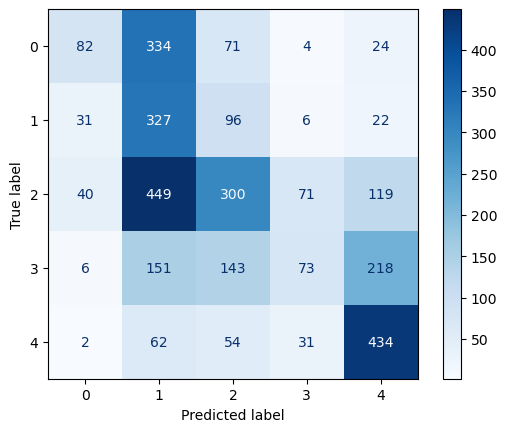

In [85]:
cm3 = confusion_matrix(y_test.argmax(axis=1), y_hat3)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels=list(range(5)))
cmd3.plot(cmap=plt.cm.Blues)
plt.show()

### Evaluación

In [86]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [87]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [88]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 13s 13s/step
Clasificación: very positive


In [89]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [90]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [91]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 2s 2s/step
Clasificación: very negative


In [92]:
text = "It works as expected, but it’s nothing special"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[ 101 2009 2573 2004 3517 1010 2021 2009 1521 1055 2498 2569  102    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [93]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [94]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 1s 1s/step
Clasificación: negative


En estos 3 casos, se observa que fueron predichos de forma correcta.

## Conclusiones

Se puede apreciar que luego de realizar transfer learning con metodología feature extractor, los modelos dieron resultados satisfactorios al evaluarlos. Estos modelos, sobre todo el 2 y el 3 que se ve la curva de validación con un comportamiento inestable, podrían mejorar sus métricas al cambiar algunos hiperparámetros como el learning rate por un valor más pequeño por ejemplo.

A futuro, si se tuviera más poder de cómputo y se usara fine tuning las métricas aumentarían cosiderablemente. 
